<a href="https://colab.research.google.com/github/DS3001/group22/blob/main/Midterm_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 22 : Project 1

## Data Wrangling

In [155]:
# imports and read the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# read by default 1st sheet of an excel file
df = pd.read_excel('result/GSS.xlsx')

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72390 entries, 0 to 72389
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      72390 non-null  int64 
 1   id_       72390 non-null  int64 
 2   wrkstat   72390 non-null  object
 3   hrs1      72390 non-null  object
 4   hrs2      72390 non-null  object
 5   evwork    72390 non-null  object
 6   wrkslf    72390 non-null  object
 7   marital   72390 non-null  object
 8   divorce   72390 non-null  object
 9   spwrksta  72390 non-null  object
 10  sphrs1    72390 non-null  object
 11  sphrs2    72390 non-null  object
 12  spevwork  72390 non-null  object
 13  spwrkslf  72390 non-null  object
 14  spocc10   72390 non-null  object
 15  spind10   72390 non-null  object
 16  degree    72390 non-null  object
 17  spdeg     72390 non-null  object
 18  ballot    72390 non-null  object
dtypes: int64(2), object(17)
memory usage: 10.5+ MB


Variables included:
- **year**: GSS year for this respondent
- **wrkstat**: labor force status
- **hrs1**: number of hours worked last week
- **hrs2**: number of hours usually work a week
- **evwork**: ever work as long as one year
- **wrkslf**: self-employed or works for somebody
- **marital**: marital status
- **divorce**: ever been divorced or seperated
- **spwrksta**: spouse labor force status
- **sphrs1**: number of hrs spouse worked last week
- **sphrs2**: number of hrs spouse usually works a week
- **spevwork**: spouse ever work as long as one year
- **spwrkslf**: spouse self-employed or works for somebody
- **spocc10**: spouse census occupation code (2010)
- **spind10**: spouse industry code (naics 2010)
- **degree**: highest degree
- **spdeg**: spouse highest degree
- **ballot**: allot used for interview


### Clean hrs1

In [157]:
df['hrs1'].unique()

array(['.i:  Inapplicable', '27', '40', '52', '35', '45', '70', '60',
       '42', '23', '55', '50', '6', '37', '36',
       '.d:  Do not Know/Cannot Choose', '48', '16', '24', '20', '80',
       '65', '15', '39', '25', '22', '44', '26', '38', '12', '41', '84',
       '18', '54', '32', '3', '29', '51', '30', '.n:  No answer',
       '89+ hrs', '43', '58', '28', '46', '8', '9', '19', '14', '66',
       '61', '49', '10', '72', '34', '75', '53', '7', '21', '47', '57',
       '71', '13', '5', '31', '17', '56', '4', '0', '33', '1', '68', '11',
       '2', '85', '62', '59', '78', '77', '64', '63', '67', '73', '88',
       '69', '76', '74', '81', '79', '86', '87', '83', '82',
       '.s:  Skipped on Web'], dtype=object)

Replace all values that do not provide information with nan

In [158]:
df.loc[df['hrs1'] == ".i:  Inapplicable", 'hrs1'] = np.nan
df.loc[df['hrs1'] == ".d:  Do not Know/Cannot Choose", 'hrs1'] = np.nan
df.loc[df['hrs1'] == ".n:  No answer", 'hrs1'] = np.nan
df.loc[df['hrs1'] == ".s:  Skipped on Web", 'hrs1'] = np.nan

Replace values listed as 89+ hrs with 95 to give distinct value

In [159]:
df.loc[df['hrs1'] == '89+ hrs', 'hrs1'] = '95';

Convert to numeric values

In [160]:
df['hrs1'] = pd.to_numeric(df['hrs1'])

In [161]:
df['hrs1'].value_counts()

40.0    14519
50.0     3127
60.0     2144
45.0     2127
30.0     1388
        ...  
69.0        8
81.0        5
79.0        3
71.0        3
87.0        3
Name: hrs1, Length: 90, dtype: int64

### Clean marital

Replace values that do not provide information with nan

In [162]:
df.loc[df['marital'] == ".s:  Skipped on Web", 'marital'] = np.nan
df.loc[df['marital'] == ".d:  Do not Know/Cannot Choose", 'marital'] = np.nan
df.loc[df['marital'] == ".n:  No answer", 'marital'] = np.nan


In [163]:
df['marital'].unique()

array(['Never married', 'Married', 'Divorced', 'Widowed', 'Separated',
       nan], dtype=object)

### Clean sphrs1

In [164]:
df.loc[df['sphrs1'] == ".i:  Inapplicable", 'sphrs1'] = np.nan
df.loc[df['sphrs1'] == ".d:  Do not Know/Cannot Choose", 'sphrs1'] = np.nan
df.loc[df['sphrs1'] == ".n:  No answer", 'sphrs1'] = np.nan
df.loc[df['sphrs1'] == ".s:  Skipped on Web", 'sphrs1'] = np.nan

df['sphrs1'].unique()

array([nan, '40', '37', '51', '60', '45', '44', '55', '24', '80', '65',
       '50', '75', '16', '36', '72', '15', '62', '20', '70', '63', '48',
       '19', '30', '56', '22', '38', '84', '18', '35', '52', '57', '32',
       '58', '43', '25', '74', '12', '3', '42', '4', '8', '5', '10', '66',
       '28', '89+ hrs', '39', '33', '59', '11', '54', '21', '79', '9',
       '46', '69', '6', '29', '47', '23', '27', '68', '13', '73', '34',
       '76', '49', '14', '78', '41', '64', '53', '77', '82', '26', '85',
       '2', '61', '88', '31', '7', '17', '71', '0', '67', '81', '1', '86',
       '.x:  Not available in this release'], dtype=object)

In [165]:
df.loc[df['sphrs1'] == ".x:  Not available in this release", 'sphrs1'] = np.nan
df.loc[df['sphrs1'] == "89+ hrs", 'sphrs1'] = "95"
df['sphrs1'] = pd.to_numeric(df['sphrs1'])
df['sphrs1'].unique()

array([nan, 40., 37., 51., 60., 45., 44., 55., 24., 80., 65., 50., 75.,
       16., 36., 72., 15., 62., 20., 70., 63., 48., 19., 30., 56., 22.,
       38., 84., 18., 35., 52., 57., 32., 58., 43., 25., 74., 12.,  3.,
       42.,  4.,  8.,  5., 10., 66., 28., 95., 39., 33., 59., 11., 54.,
       21., 79.,  9., 46., 69.,  6., 29., 47., 23., 27., 68., 13., 73.,
       34., 76., 49., 14., 78., 41., 64., 53., 77., 82., 26., 85.,  2.,
       61., 88., 31.,  7., 17., 71.,  0., 67., 81.,  1., 86.])

### Clean divorced

In [166]:
df.loc[df['divorce'] == '.n:  No answer', 'divorce'] = np.nan
df.loc[df['divorce'] == '.s:  Skipped on Web', 'divorce'] = np.nan
df.loc[df['divorce'] == '.i:  Inapplicable', 'divorce'] = np.nan
df.loc[df['divorce'] == '.d:  Do not Know/Cannot Choose', 'divorce'] = np.nan


df['divorce'].unique()

array([nan, 'NO', 'YES'], dtype=object)

### Clean degree

In [167]:
df.loc[df['degree'] == ".n:  No answer", 'degree'] = np.nan
df.loc[df['degree'] == ".d:  Do not Know/Cannot Choose", 'degree'] = np.nan
df.loc[df['degree'] == ".s:  Skipped on Web", 'degree'] = np.nan

df['degree'].unique()


array(["Bachelor's", 'Less than high school', 'High school', 'Graduate',
       'Associate/junior college', nan], dtype=object)

## Create DataFrames

In this section we will construct a variety of dataframes to select different combinations

#### df_usable

In [168]:
df_usable = df
df_usable = df_usable.dropna()
df.head()

,year,id_,wrkstat,hrs1,hrs2,evwork,wrkslf,marital,divorce,spwrksta,sphrs1,sphrs2,spevwork,spwrkslf,spocc10,spind10,degree,spdeg,ballot
0,1972,1,Working full time,NaN,.i: Inapplicable,.i: Inapplicable,Someone else,Never married,NaN,.i: Inapplicable,NaN,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Bachelor's,.i: Inapplicable,.i: Inapplicable
1,1972,2,Retired,NaN,.i: Inapplicable,YES,Someone else,Married,NO,KEEPING HOUSE,NaN,.i: Inapplicable,NO,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Less than high school,HIGH SCHOOL,.i: Inapplicable
2,1972,3,Working part time,NaN,.i: Inapplicable,.i: Inapplicable,Someone else,Married,NO,WORKING FULLTIME,NaN,.i: Inapplicable,.i: Inapplicable,SOMEONE ELSE,"Property, real estate, and community associati...",Real estate,High school,.n: No answer,.i: Inapplicable
3,1972,4,Working full time,NaN,.i: Inapplicable,.i: Inapplicable,Someone else,Married,NO,WORKING FULLTIME,NaN,.i: Inapplicable,.i: Inapplicable,SOMEONE ELSE,"Tax examiners and collectors, and revenue agents",Public finance activities,Bachelor's,GRADUATE,.i: Inapplicable
4,1972,5,Keeping house,NaN,.i: Inapplicable,YES,Someone else,Married,NO,TEMP NOT WORKING,NaN,.i: Inapplicable,.i: Inapplicable,SOMEONE ELSE,"Rolling machine setters, operators, and tender...",Nonferrous metal (except aluminum) production ...,High school,HIGH SCHOOL,.i: Inapplicable


#### married_df

Create married_df containing all rows containing married participants

In [169]:
married_df = df.loc[df['marital'] == 'Married']
married_df = married_df.dropna()
married_df.head()

,year,id_,wrkstat,hrs1,hrs2,evwork,wrkslf,marital,divorce,spwrksta,sphrs1,sphrs2,spevwork,spwrkslf,spocc10,spind10,degree,spdeg,ballot
1615,1973,3,Working full time,40.0,.i: Inapplicable,.i: Inapplicable,Someone else,Married,NO,WORKING FULLTIME,40.0,.i: Inapplicable,.i: Inapplicable,SOMEONE ELSE,"Painters, construction and maintenance",Construction,Less than high school,LT HIGH SCHOOL,.i: Inapplicable
1616,1973,4,Working full time,40.0,.i: Inapplicable,.i: Inapplicable,Someone else,Married,NO,WORKING FULLTIME,37.0,.i: Inapplicable,.i: Inapplicable,SOMEONE ELSE,Print binding and finishing workers,"Periodical, book, and directory publishers",High school,HIGH SCHOOL,.i: Inapplicable
1628,1973,16,Working full time,60.0,.i: Inapplicable,.i: Inapplicable,Self-employed,Married,NO,WORKING FULLTIME,44.0,.i: Inapplicable,.i: Inapplicable,SELF-EMPLOYED,"Bookkeeping, accounting, and auditing clerks",Natural gas distribution,High school,HIGH SCHOOL,.i: Inapplicable
1635,1973,23,Working full time,40.0,.i: Inapplicable,.i: Inapplicable,Someone else,Married,NO,WORKING FULLTIME,40.0,.i: Inapplicable,.i: Inapplicable,SOMEONE ELSE,.u: Uncodable,"Justice, public order, and safety activities",High school,HIGH SCHOOL,.i: Inapplicable
1649,1973,37,Working part time,23.0,.i: Inapplicable,.i: Inapplicable,Someone else,Married,NO,WORKING FULLTIME,50.0,.i: Inapplicable,.i: Inapplicable,SOMEONE ELSE,"Sales representatives, wholesale and manufact...",Not specified manufacturing industries,Bachelor's,BACHELOR,.i: Inapplicable


#### single_df

Create single_df containing all rows containing non-married participants

In [170]:
single_df = df.loc[df['marital'] != 'Married']
single_df = single_df[single_df['hrs1'].notna()]
single_df.head(20)

,year,id_,wrkstat,hrs1,hrs2,evwork,wrkslf,marital,divorce,spwrksta,sphrs1,sphrs2,spevwork,spwrkslf,spocc10,spind10,degree,spdeg,ballot
1618,1973,6,Working full time,52.0,.i: Inapplicable,.i: Inapplicable,Someone else,Divorced,NaN,.i: Inapplicable,NaN,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,High school,.i: Inapplicable,.i: Inapplicable
1620,1973,8,Working full time,35.0,.i: Inapplicable,.i: Inapplicable,Someone else,Never married,NaN,.i: Inapplicable,NaN,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Bachelor's,.i: Inapplicable,.i: Inapplicable
1623,1973,11,Working full time,45.0,.i: Inapplicable,.i: Inapplicable,Someone else,Widowed,NO,.i: Inapplicable,NaN,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Less than high school,.i: Inapplicable,.i: Inapplicable
1631,1973,19,Working full time,40.0,.i: Inapplicable,.i: Inapplicable,Someone else,Divorced,NaN,.i: Inapplicable,NaN,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,High school,.i: Inapplicable,.i: Inapplicable
1642,1973,30,Working full time,40.0,.i: Inapplicable,.i: Inapplicable,Someone else,Never married,NaN,.i: Inapplicable,NaN,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,High school,.i: Inapplicable,.i: Inapplicable
1654,1973,42,Working full time,45.0,.i: Inapplicable,.i: Inapplicable,Someone else,Widowed,NO,.i: Inapplicable,NaN,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Less than high school,.i: Inapplicable,.i: Inapplicable
1659,1973,47,Working full time,50.0,.i: Inapplicable,.i: Inapplicable,Someone else,Never married,NaN,.i: Inapplicable,NaN,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Bachelor's,.i: Inapplicable,.i: Inapplicable
1667,1973,55,Working full time,37.0,.i: Inapplicable,.i: Inapplicable,Someone else,Widowed,NO,.i: Inapplicable,NaN,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,High school,.i: Inapplicable,.i: Inapplicable
1675,1973,63,Working full time,60.0,.i: Inapplicable,.i: Inapplicable,Someone else,Never married,NaN,.i: Inapplicable,NaN,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,High school,.i: Inapplicable,.i: Inapplicable
1682,1973,70,Working full time,40.0,.i: Inapplicable,.i: Inapplicable,Someone else,Never married,NaN,.i: Inapplicable,NaN,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Less than high school,.i: Inapplicable,.i: Inapplicable


#### divorced_single_df

In [171]:
divorced_single_df = single_df.loc[single_df['divorce'] == 'YES']
divorced_single_df = divorced_single_df[divorced_single_df['hrs1'].notna()]
divorced_single_df.head()

,year,id_,wrkstat,hrs1,hrs2,evwork,wrkslf,marital,divorce,spwrksta,sphrs1,sphrs2,spevwork,spwrkslf,spocc10,spind10,degree,spdeg,ballot
1925,1973,313,Working full time,35.0,.i: Inapplicable,.i: Inapplicable,Someone else,Widowed,YES,.i: Inapplicable,NaN,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,High school,.i: Inapplicable,.i: Inapplicable
2076,1973,464,Working part time,25.0,.i: Inapplicable,.i: Inapplicable,Someone else,Widowed,YES,.i: Inapplicable,NaN,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Graduate,.i: Inapplicable,.i: Inapplicable
2173,1973,561,Working full time,45.0,.i: Inapplicable,.i: Inapplicable,Self-employed,Widowed,YES,.i: Inapplicable,NaN,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Less than high school,.i: Inapplicable,.i: Inapplicable
2485,1973,873,Working full time,30.0,.i: Inapplicable,.i: Inapplicable,Someone else,Widowed,YES,.i: Inapplicable,NaN,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Bachelor's,.i: Inapplicable,.i: Inapplicable
2954,1973,1342,Working part time,12.0,.i: Inapplicable,.i: Inapplicable,Someone else,Widowed,YES,.i: Inapplicable,NaN,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Less than high school,.i: Inapplicable,.i: Inapplicable


#### divorced_remarried_df

In [172]:
divorced_remarried_df = df.loc[df['marital'] == 'Married']
divorced_remarried_df = divorced_remarried_df.loc[divorced_remarried_df['divorce'] == 'YES']
divorced_remarried_df = divorced_remarried_df.dropna()
divorced_remarried_df.head()

,year,id_,wrkstat,hrs1,hrs2,evwork,wrkslf,marital,divorce,spwrksta,sphrs1,sphrs2,spevwork,spwrkslf,spocc10,spind10,degree,spdeg,ballot
1739,1973,127,Working part time,27.0,.i: Inapplicable,.i: Inapplicable,Self-employed,Married,YES,WORKING FULLTIME,50.0,.i: Inapplicable,.i: Inapplicable,SOMEONE ELSE,Mechanical engineers,"Sporting and athletic goods, and doll, toy and...",High school,HIGH SCHOOL,.i: Inapplicable
1777,1973,165,Working full time,45.0,.i: Inapplicable,.i: Inapplicable,Someone else,Married,YES,WORKING FULLTIME,48.0,.i: Inapplicable,.i: Inapplicable,SOMEONE ELSE,First-line supervisors of production and opera...,.n: No answer,Less than high school,HIGH SCHOOL,.i: Inapplicable
1780,1973,168,Working full time,84.0,.i: Inapplicable,.i: Inapplicable,Self-employed,Married,YES,WORKING FULLTIME,84.0,.i: Inapplicable,.i: Inapplicable,SELF-EMPLOYED,First-line supervisors of retail sales workers,Grocery stores,High school,LT HIGH SCHOOL,.i: Inapplicable
1791,1973,179,Working full time,40.0,.i: Inapplicable,.i: Inapplicable,Someone else,Married,YES,WORKING FULLTIME,45.0,.i: Inapplicable,.i: Inapplicable,SOMEONE ELSE,Shoe machine operators and tenders,Footwear manufacturing,Less than high school,HIGH SCHOOL,.i: Inapplicable
1808,1973,196,Working full time,40.0,.i: Inapplicable,.i: Inapplicable,Self-employed,Married,YES,WORKING FULLTIME,40.0,.i: Inapplicable,.i: Inapplicable,SOMEONE ELSE,Registered nurses,Administration of human resource programs,Bachelor's,HIGH SCHOOL,.i: Inapplicable


#### always_single_df

In [173]:
always_single_df = single_df.loc[single_df['marital'] == 'Never married']
always_single_df = always_single_df[always_single_df['hrs1'].notna()]
always_single_df.head()

,year,id_,wrkstat,hrs1,hrs2,evwork,wrkslf,marital,divorce,spwrksta,sphrs1,sphrs2,spevwork,spwrkslf,spocc10,spind10,degree,spdeg,ballot
1620,1973,8,Working full time,35.0,.i: Inapplicable,.i: Inapplicable,Someone else,Never married,NaN,.i: Inapplicable,NaN,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Bachelor's,.i: Inapplicable,.i: Inapplicable
1642,1973,30,Working full time,40.0,.i: Inapplicable,.i: Inapplicable,Someone else,Never married,NaN,.i: Inapplicable,NaN,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,High school,.i: Inapplicable,.i: Inapplicable
1659,1973,47,Working full time,50.0,.i: Inapplicable,.i: Inapplicable,Someone else,Never married,NaN,.i: Inapplicable,NaN,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Bachelor's,.i: Inapplicable,.i: Inapplicable
1675,1973,63,Working full time,60.0,.i: Inapplicable,.i: Inapplicable,Someone else,Never married,NaN,.i: Inapplicable,NaN,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,High school,.i: Inapplicable,.i: Inapplicable
1682,1973,70,Working full time,40.0,.i: Inapplicable,.i: Inapplicable,Someone else,Never married,NaN,.i: Inapplicable,NaN,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Less than high school,.i: Inapplicable,.i: Inapplicable


#### divorced_df

In [174]:
divorced_df = df.loc[df['divorce'] == 'YES']
divorced_df = divorced_df[divorced_df['hrs1'].notna()]
divorced_df.head()

,year,id_,wrkstat,hrs1,hrs2,evwork,wrkslf,marital,divorce,spwrksta,sphrs1,sphrs2,spevwork,spwrkslf,spocc10,spind10,degree,spdeg,ballot
1640,1973,28,Working part time,27.0,.i: Inapplicable,.i: Inapplicable,Someone else,Married,YES,TEMP NOT WORKING,NaN,73,.i: Inapplicable,SOMEONE ELSE,Driver/sales workers and truck drivers,Truck transportation,High school,LT HIGH SCHOOL,.i: Inapplicable
1697,1973,85,Working full time,60.0,.i: Inapplicable,.i: Inapplicable,Self-employed,Married,YES,KEEPING HOUSE,NaN,.i: Inapplicable,YES,SOMEONE ELSE,"Nursing, psychiatric, and home health aides",Nursing care facilities,Less than high school,LT HIGH SCHOOL,.i: Inapplicable
1720,1973,108,Working full time,50.0,.i: Inapplicable,.i: Inapplicable,Someone else,Married,YES,KEEPING HOUSE,NaN,.i: Inapplicable,NO,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,High school,HIGH SCHOOL,.i: Inapplicable
1739,1973,127,Working part time,27.0,.i: Inapplicable,.i: Inapplicable,Self-employed,Married,YES,WORKING FULLTIME,50.0,.i: Inapplicable,.i: Inapplicable,SOMEONE ELSE,Mechanical engineers,"Sporting and athletic goods, and doll, toy and...",High school,HIGH SCHOOL,.i: Inapplicable
1747,1973,135,Working full time,40.0,.i: Inapplicable,.i: Inapplicable,Someone else,Married,YES,OTHER,NaN,.i: Inapplicable,YES,SOMEONE ELSE,Driver/sales workers and truck drivers,.u: Uncodable,Associate/junior college,LT HIGH SCHOOL,.i: Inapplicable


## Data Visualization

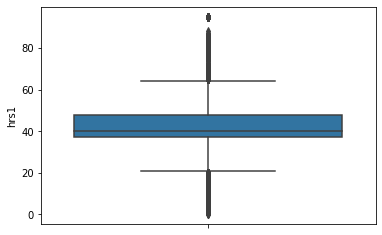

In [175]:
sns.boxplot(data=married_df, y='hrs1')
plt.show()

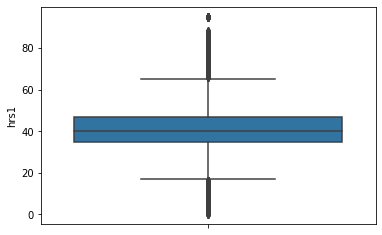

In [176]:
sns.boxplot(data=single_df, y="hrs1")
plt.show()

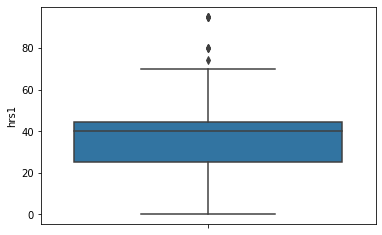

In [177]:
sns.boxplot(data=divorced_single_df, y="hrs1")
plt.show()

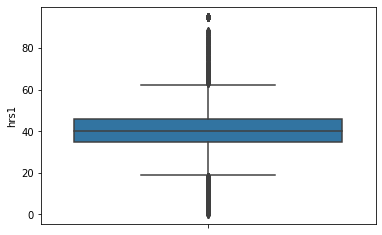

In [178]:
sns.boxplot(data=always_single_df, y='hrs1')
plt.show()

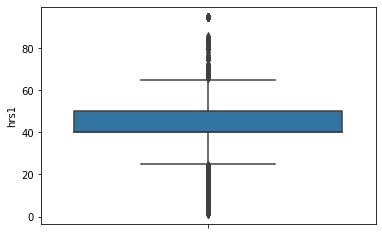

In [179]:
sns.boxplot(data=divorced_remarried_df, y='hrs1')
plt.show()

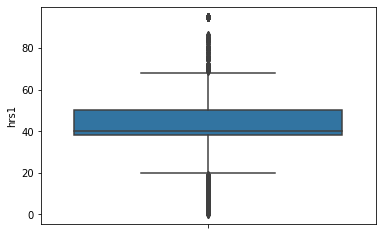

In [180]:
sns.boxplot(data=divorced_df, y='hrs1')
plt.show()

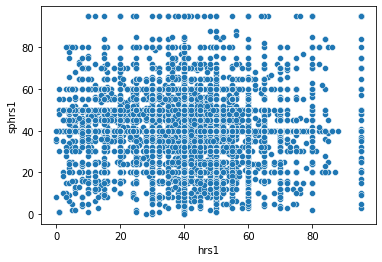

In [182]:
sns.scatterplot(data = df_usable, x = 'hrs1', y='sphrs1')
plt.show()

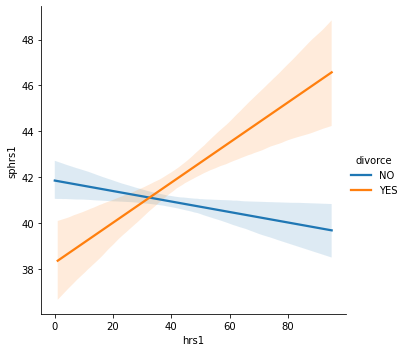

In [183]:
sns.lmplot(data=df_usable, x="hrs1", y="sphrs1", hue = "divorce", scatter = False)
plt.show()

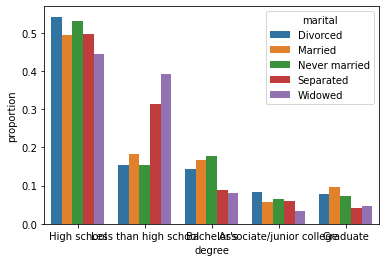

In [184]:
x, y, hue = "degree", "proportion", "marital"

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
plt.show()

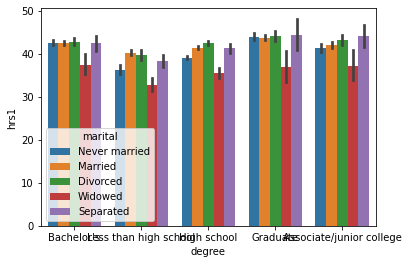

In [185]:
sns.barplot(data = df, x = 'degree', y = 'hrs1', hue = 'marital')
plt.show()

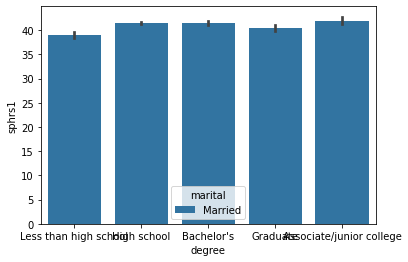

In [187]:
sns.barplot(data = married_df, x = 'degree', y = 'sphrs1', hue = 'marital')
plt.show()